In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib import cm

In [2]:
data=loadmat(r"ex8_movies.mat")
#The dataset has nu=943 users, and nm= 1682 movies
Y=data["Y"] # Y is a 1682 x 943 matrix, containing ratings (1 - 5) of 1682 movies on 943 users
R=data["R"] # Binary indicator matrix R(i,j)=1 if user j raed movie i, 0 o.w

In [3]:
Y.shape

(1682, 943)

In [4]:
R.shape

(1682, 943)

## DATA VISUALIZATION

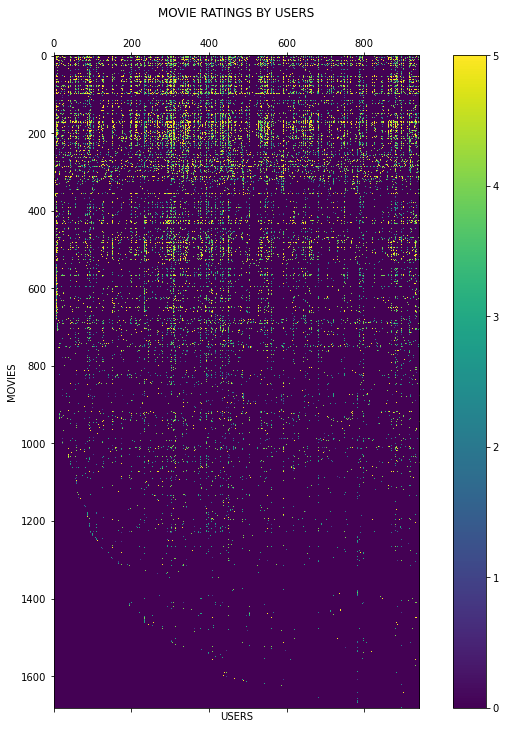

In [5]:
figure = plt.figure(figsize=(12,12)) 
ax1 = figure.add_subplot(111)  
caxes = ax1.matshow(Y) 
figure.colorbar(caxes)
ax1.set_xlabel("USERS") 
ax1.set_ylabel("MOVIES") 
ax1.set_title("MOVIE RATINGS BY USERS") 
plt.show() 

In [6]:
def mean_of_movies_rated(Y,R):
    movies,users=Y.shape
    total_mean=np.zeros((Y.shape[0],1))

    for movie in range(0,movies):
        count=0
        mean=0
        for user in range(0,users):
            if R[movie,:][user] == 1:
                count+=1
                mean+=Y[movie,:][user]
        mean=mean/count
        total_mean[movie]=mean
    return total_mean
        
    

In [122]:
mean=mean_of_movies_rated(Y,R)
mean.shape

(1682, 1)

####  In order to start the program we will first start with X features 

In [176]:
data=loadmat(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\Machine_learning_stanford\datasets\ex8_movieParams.mat")
data
X=data["X"]
Theta=data["Theta"]
num_users=data["num_users"]
num_movies=data["num_movies"]
num_features=data["num_features"]

In [177]:
movies,users=(5,4)
features=3
X1 = X[0:movies,0:features]
Theta1 = Theta[0:users,0:features]
Y1 = Y[0:movies,0:users]
R1 = R[0:movies,0:users]
R1

array([[1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

### For loop implementation

In [178]:
def J(X1,Theta1,R1,Y1,users,movies):
    j=0
    for movie in range(0,movies):
        for user in range(0,users):
            if R1[movie,user]==1:
                j+=(Theta1[user,:].dot(X1[movie,:])-Y1[movie,user])**2
    j=0.5*j
    return j

In [179]:
j=J(X1,Theta1,R1,Y1,users,movies)
j

22.22460372568567

### Matrix implementation unregularized

In [180]:
def J_v(X1,Theta1,R1,Y1):
    j = 0.5*((X1.dot(Theta1.T)*R1-Y1)**2).sum()
    return j
def gradient_X(X1,Theta1,R1,Y1):
    dj_dx=(X1.dot(Theta1.T)*R1-Y1).dot(Theta1)
    return dj_dx

def gradient_theta(X1,Theta1,R1,Y1):
    dj_dt=(X1.dot(Theta1.T)*R1-Y1).T.dot(X1)
    return dj_dt

In [181]:
j=J_v(X1,Theta1,R1,Y1)
j

22.224603725685675

In [182]:
dj_dx=gradient_X(X1,Theta1,R1,Y1)
dj_dx

array([[-2.52899165,  7.57570308, -1.89979026],
       [-0.56819597,  3.35265031, -0.52339845],
       [-0.83240713,  4.91163297, -0.76677878],
       [-0.38358278,  2.26333698, -0.35334048],
       [-0.80378006,  4.74271842, -0.74040871]])

In [183]:
dj_dt=gradient_theta(X1,Theta1,R1,Y1)
dj_dt

array([[-10.5680202 ,   4.62776019,  -7.16004443],
       [ -3.05099006,   1.16441367,  -3.47410789],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ]])

### Matrix implementation regularized

In [184]:
def J_v_r(X1,Theta1,R1,Y1,lam):
    j = 0.5*((X1.dot(Theta1.T)*R1-Y1)**2).sum() + lam/2*((Theta1**2).sum()+(X1**2).sum())
    return j
def gradient_X_r(X1,Theta1,R1,Y1,lam):
    dj_dx=(X1.dot(Theta1.T)*R1-Y1).dot(Theta1) + lam*X1
    return dj_dx

def gradient_theta_r(X1,Theta1,R1,Y1,lam):
    dj_dt=(X1.dot(Theta1.T)*R1-Y1).T.dot(X1) + lam*Theta1
    return dj_dt

In [185]:
lam=1.5
jr=J_v_r(X1,Theta1,R1,Y1,lam)
jr

31.34405624427422

In [186]:
dj_dx_r=gradient_X_r(X1,Theta1,R1,Y1,lam)
dj_dx_r

array([[-0.95596339,  6.97535514, -0.10861109],
       [ 0.60308088,  2.77421145,  0.25839822],
       [ 0.12985616,  4.0898522 , -0.89247334],
       [ 0.29684395,  1.06300933,  0.66738144],
       [ 0.60252677,  4.90185327, -0.19747928]])

In [187]:
dj_dt_r=gradient_theta_r(X1,Theta1,R1,Y1,lam)
dj_dt_r

array([[-10.13985478,   2.10136256,  -6.76563628],
       [ -2.29347024,   0.48244098,  -2.99791422],
       [ -0.64787484,  -0.71820673,   1.27006666],
       [  1.09289758,  -0.40784086,   0.49026541]])

In [188]:
movies,users=(5,4)
features=3
X1 = X[0:movies,0:features]
Theta1 = Theta[0:users,0:features]
Y1 = Y[0:movies,0:users]
R1 = R[0:movies,0:users]
R1

array([[1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [189]:
alfa=0.001
iteration=100000
costs=[]
lam=0.2
for epoch in range(0,iteration):
    if epoch % 10000 == 0:
        cost=J_v_r(X1,Theta1,R1,Y1,lam)
        costs.append(cost)
    X1=X1-alfa/Y1.shape[0]*gradient_X_r(X1,Theta1,R1,Y1,lam)
    Theta1=Theta1-alfa/Y1.shape[0]*gradient_theta_r(X1,Theta1,R1,Y1,lam)

costs

[23.44053072816415,
 2.2188542344607245,
 2.135128954866105,
 2.1015860453337036,
 2.087127954717699,
 2.0805544987376026,
 2.0774144836473223,
 2.0758217532745755,
 2.0749469518991885,
 2.0744170418727443]

##### Prediction:

In [190]:
X1.dot(Theta1.T)*R1

array([[4.98305073, 3.81078203, 0.        , 0.        ],
       [2.91149009, 0.        , 0.        , 0.        ],
       [3.88197757, 0.        , 0.        , 0.        ],
       [2.91148812, 0.        , 0.        , 0.        ],
       [2.91149174, 0.        , 0.        , 0.        ]])

###### Actual Data

In [191]:
Y1

array([[5, 4, 0, 0],
       [3, 0, 0, 0],
       [4, 0, 0, 0],
       [3, 0, 0, 0],
       [3, 0, 0, 0]], dtype=uint8)

## Implementation with all the data

In [192]:
alfa=0.001
iteration=100
costs=[]
lam=0.2
for epoch in range(0,iteration):
    if epoch % 10000 == 0:
        cost=J_v_r(X,Theta,R,Y,lam)
        costs.append(cost)
    X=X-alfa/Y.shape[0]*gradient_X_r(X,Theta,R,Y,lam)
    Theta=Theta-alfa/Y.shape[0]*gradient_theta_r(X,Theta,R,Y,lam)

costs

[28839.04858968128]

In [26]:
(X.dot(Theta.T)*R)[0:5,0:5]

array([[3.73906974, 3.71826273, 0.        , 0.        , 3.92408768],
       [3.16216674, 0.        , 0.        , 0.        , 2.89888165],
       [3.28335117, 0.        , 0.        , 0.        , 0.        ],
       [4.3698301 , 0.        , 0.        , 0.        , 0.        ],
       [2.58437685, 0.        , 0.        , 0.        , 0.        ]])

In [27]:
Y[0:5,0:5]

array([[5, 4, 0, 0, 4],
       [3, 0, 0, 0, 3],
       [4, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [3, 0, 0, 0, 0]], dtype=uint8)

### Lets apply the algorithm to our own likings

In [81]:

text_file = open(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\Machine_learning_stanford\datasets\movie_ids.txt","r") 
MOVIE_NAMES=[]
for i in range(0,Y.shape[0]):
    aa=text_file.readline()
    MOVIE_NAMES.append(aa)
text_file.close()

In [89]:
my_ratings=np.zeros((Y.shape[0],1))
my_ratings.shape

(1682, 1)

In [90]:
#Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0]  = 4
#Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2 

#We have selected a few movies we liked / did not like and the ratings we gave are as follows:
my_ratings[6]  = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182]= 4
my_ratings[225]= 5
my_ratings[354]= 5

In [99]:
R_my_ratings=(my_ratings>1).astype(np.float32)
R_my_ratings.shape

(1682, 1)

In [109]:
for i in range(0,R_my_ratings.shape[0]):
    if R_my_ratings[i] > 0:
        print("Movie:", MOVIE_NAMES[i],"Rating:",my_ratings[i].astype(int))

Movie: 1 Toy Story (1995)
 Rating: [4]
Movie: 7 Twelve Monkeys (1995)
 Rating: [3]
Movie: 12 Usual Suspects, The (1995)
 Rating: [5]
Movie: 54 Outbreak (1995)
 Rating: [4]
Movie: 64 Shawshank Redemption, The (1994)
 Rating: [5]
Movie: 66 While You Were Sleeping (1995)
 Rating: [3]
Movie: 69 Forrest Gump (1994)
 Rating: [5]
Movie: 98 Silence of the Lambs, The (1991)
 Rating: [2]
Movie: 183 Alien (1979)
 Rating: [4]
Movie: 226 Die Hard 2 (1990)
 Rating: [5]
Movie: 355 Sphere (1998)
 Rating: [5]


# Lets add our user to the recomender system

In [112]:
Y.shape

(1682, 943)

In [114]:
Yn=np.hstack((my_ratings, Y)) 
Yn.shape

(1682, 944)

In [118]:
R.shape

(1682, 943)

In [120]:
Rn=np.hstack((R_my_ratings, R))
Rn.shape

(1682, 944)

In [126]:
mean_n=mean_of_movies_rated(Yn,Rn)
mean_n.shape

(1682, 1)

In [129]:
Rnnorm=Rn*mean_n
Rnnorm[0:5,0:5]

array([[3.8785872 , 3.8785872 , 3.8785872 , 0.        , 0.        ],
       [0.        , 3.20610687, 0.        , 0.        , 0.        ],
       [0.        , 3.03333333, 0.        , 0.        , 0.        ],
       [0.        , 3.55023923, 0.        , 0.        , 0.        ],
       [0.        , 3.30232558, 0.        , 0.        , 0.        ]])

In [132]:
Ynnorm=Yn-Rnnorm
Ynnorm[0:5,0:5]

array([[ 0.1214128 ,  1.1214128 ,  0.1214128 ,  0.        ,  0.        ],
       [ 0.        , -0.20610687,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.96666667,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.55023923,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.30232558,  0.        ,  0.        ,  0.        ]])

In [196]:
movies,users=Ynnorm.shape
features=5
#X2 = np.random.rand(movies,features) # since we have run the program once we want to store an optimized X2 and theta2
#Theta2 =np.random.rand(users,features) # therefore this lines are no longer needed
X2=np.load("X2.npy")
Theta2=np.load("Theta2.npy")
print("Movies:",movies,"Users:",users)

Movies: 1682 Users: 944


In [197]:
alfa=0.001
iteration=1000
costs=[]
lam=0.2
for epoch in range(0,iteration):
    if epoch % 100 == 0:
        cost=J_v_r(X2,Theta2,Rn,Ynnorm,lam)
        costs.append(cost)
    X2=X2-alfa/Ynnorm.shape[0]*gradient_X_r(X2,Theta2,Rn,Ynnorm,lam)
    Theta2=Theta2-alfa/Y.shape[0]*gradient_theta_r(X2,Theta2,Rn,Ynnorm,lam)

costs

[48702.94777476785,
 48672.053931126466,
 48641.45097270196,
 48611.134354070135,
 48581.09962258829,
 48551.34241608709,
 48521.858460630516,
 48492.64356834053,
 48463.69363528526,
 48435.004639428014]

In [198]:
np.save("X2.npy",X2)
np.save("Theta2.npy",Theta2)

### LETS MAKE PREDICTIONS

In [169]:
prediction = X2.dot(Theta2.T)*Rn + mean_n
prediction

array([[4.16818254, 3.78830126, 3.98214715, ..., 3.88695258, 3.8785872 ,
        3.8785872 ],
       [3.20610687, 3.50296035, 3.20610687, ..., 3.20610687, 3.20610687,
        3.73286465],
       [3.03333333, 3.36786954, 3.03333333, ..., 3.03333333, 3.03333333,
        3.03333333],
       ...,
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ]])

In [226]:
radomlist=[]
for i in range(0,5):
    random=np.random.randint(0, 1681)
    radomlist.append(random)
print(radomlist)

[583, 474, 511, 282, 1289]


In [227]:
print("___________MOVIE REVIES FOR YOU____________\n")
user_values=200 # 0 since that is the corresponding value to my likings
for random in radomlist:
    print("Movie:",MOVIE_NAMES[random],"Rating:",prediction[random,user_values],"/5\n")

___________MOVIE REVIES FOR YOU____________

Movie: 584 Secret Garden, The (1993)
 Rating: 4.387638719580099 /5

Movie: 475 Trainspotting (1996)
 Rating: 3.884 /5

Movie: 512 Wings of Desire (1987)
 Rating: 4.0 /5

Movie: 283 Emma (1996)
 Rating: 3.7175141242937855 /5

Movie: 1290 Country Life (1994)
 Rating: 1.5 /5



In [228]:
print("___________MOVIE REVIES FOR YOU____________\n")
user_values=900 # 0 since that is the corresponding value to my likings
for random in radomlist:
    print("Movie:",MOVIE_NAMES[random],"Rating:",prediction[random,user_values],"/5\n")

___________MOVIE REVIES FOR YOU____________

Movie: 584 Secret Garden, The (1993)
 Rating: 3.5443037974683542 /5

Movie: 475 Trainspotting (1996)
 Rating: 3.884 /5

Movie: 512 Wings of Desire (1987)
 Rating: 4.0 /5

Movie: 283 Emma (1996)
 Rating: 3.7175141242937855 /5

Movie: 1290 Country Life (1994)
 Rating: 1.5 /5



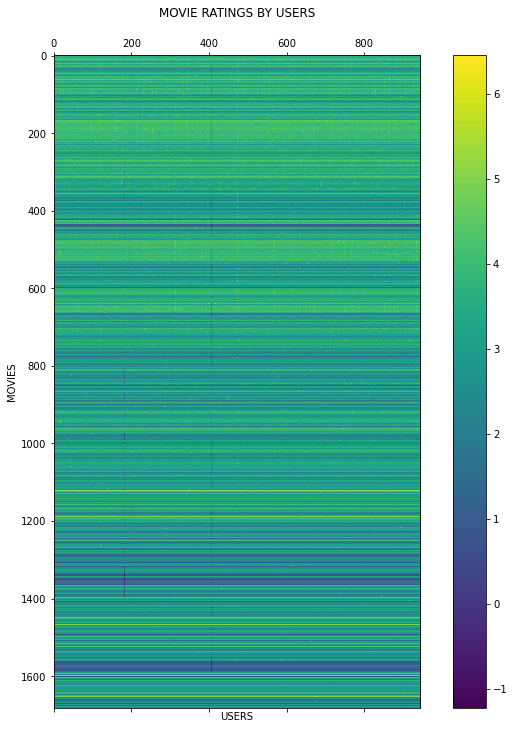

In [171]:
figure = plt.figure(figsize=(12,12)) 
ax1 = figure.add_subplot(111)  
caxes = ax1.matshow(prediction) 
figure.colorbar(caxes)
ax1.set_xlabel("USERS") 
ax1.set_ylabel("MOVIES") 
ax1.set_title("MOVIE RATINGS BY USERS") 
plt.show() 

## Notes

In [28]:
for movie in range(0,movies):
    for user in range(0,users):
        if R1[movie,user]==1:
            print([movie,user])

[0, 0]
[0, 1]
[1, 0]
[2, 0]
[3, 0]
[4, 0]
